<h1><b><center>Extractive Text Summarization for News Articles </center></b></h1>
<h2><b><center>Information Retrieval</center></b></h2>
<h3><b><center> FAISAL RIAZ, WASEEM ABBAS </center></b></h3>
<h3><b><center> F2019313020, F2019313001</center></b></h3>

### Importing Required Packages###

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

### Importing the Dataset 

In [2]:
df = pd.read_csv("IK_Trump.csv", engine ='python')
df.head(5)

,ArticleID,ArticleTitle,ArticleText,ArticleSource
0,0,"On the Coronavirus, Pakistan’s Government Is M...","During a televised broadcast on March 22, Paki...",https://foreignpolicy.com/2020/05/11/on-corona...
1,1,Pakistan Plans Another COVID-19 Lockdown. Will...,The government in Pakistan is considering the ...,https://thediplomat.com/2020/05/pakistan-plans...
2,2,COVID-19: Pakistan has a ‘dependency syndrome’...,As Pakistan grapples to combat coronavirus wit...,https://gulfnews.com/world/asia/pakistan/covid...
3,3,COVID19 and Pakistan: The Economic Fallout,As Pakistan grapples to combat coronavirus wit...,https://www.orfonline.org/research/covid19-and...
4,4,Donald Trump says he’s taking hydroxychloroqui...,President Donald Trump said he’s taking antima...,https://www.theverge.com/2020/5/18/21262873/tr...


### Dispaying the Text contained within an article

In [3]:
df['ArticleText'][2]

'As Pakistan grapples to combat coronavirus with increasing number of cases, Prime Minister Imran Khan has urged the need to build its own reliable medical infrastructure.\n“The coronavirus has brought to the fore that Pakistan needs to build its medical infrastructure and reduce dependency on foreign aid,” added Imran.\nSpeaking during this visit to COMSTECH exhibition in Islamabad on Wednesday, Prime Minister Imran said:“We have a dependency syndrome; we don’t have that self-belief, we didn’t progress towards knowledge economy because we didn’t spend on education and research. Pakistanis excel once they immigrate; why can’t you create that system here?”““We have to focus on building our medical infrastructure so that we are prepared for any such emergency situation in the future,”  he said and added that the COVID-19 crisis provided an opportunity to produce locally manufactured ventilators and protective equipment as everything cannot be imported. OMSTECH stands for the Organisation

In [4]:
df['ArticleText'][5]

'President Donald Trump has told graduates of the country\'s top military academy that the US forces are "not the policeman of the world" days after threatening to deploy active troops to quell protests across the country sparked by the police killing of an unarmed Black man. Speaking to new graduates of the United States Military Academy at West Point on Saturday, Trump praised the "righteous glory of the American warrior" but largely side-stepped the recent controversies of racial unrest and the military\'s role in putting down the nationwide protests that followed the May 25 death of George Floyd in Minnesota after a white officer kneeled on his neck for almost nine minutes. What has made America unique is the durability of its institutions against the passions and prejudices of the moment. When times are turbulent, when the road is rough, what matters most is that which is permanent, timeless, enduring and eternal," Trump said, in one of the few apparent references to the domestic 

### Function to read Text from the Article and returning list of sentences ###
1- Article Id is passed to function.

2- Text is read from the Atricles DataFrame and split into sentences with period(.).

3- All non characters are replaced with space and Sentence list is populated. 

4- Sentences is a list of each sentence tokenized. [[sent1],[sent2],.....[sentn]]

In [5]:
def read_article_text(article_id):
    article = df['ArticleText'][article_id].split(". ")
    sentences = []

    for sentence in article:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" ")) #replacing all non characters with "space"
    sentences.pop() 
    
    return sentences

### Function to create similarity matrix
#### ***NxN matrix where N is length/no of sentence***
S= Sentence and N=3 
$$\begin{bmatrix} S_{1}S_{1} & S_{1}S_{2} & S_{1}S_{3} \\ S_{2}S_{1} & S_{2}S_{2} & S_{2}S_{3} \\ S_{3}S_{1} & S_{3}S_{2} & S_{3}S_{3}\end{bmatrix}$$

1- Creating a matrix with zeros NxN where N = no of sentences.

2- Check if sentences are not similar than pass on the both sentences to sentence similarity function.

3- Sentence similarity function will calculate the cosine similarity and the matrix is updated according to
   sentnece index position.
   
4- Thus populating the whole NxN similarity matrix.



In [6]:
def create_similarity_matrix(sentences, stop_words):
    
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    print("length of sentences is |",len(sentences))
 
    for index1 in range(len(sentences)):
      
        for index2 in range(len(sentences)):
            if index1 == index2: #ignore if both are same sentences
                
                continue 
                
            similarity_matrix[index1][index2] = sentence_similarity(sentences[index1], sentences[index2], stop_words)
            
           
    return similarity_matrix

### Function to find cosine similarity/distance between sentences
1- Two Sentences which are  not equal indices are passed to this function.

2- Two Vectors are created filled with 0 equal to the number of unique tokens in all_words.

3- Search the for each Token in all_words list and update the index of token in Vector1 and then for Vector2.

4- Returning the Cosine distance and returning to previous function to update similarity values for two sentnences.


In [7]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
    
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        
        vector1[all_words.index(w)] += 1
        
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
        
        
    
    return (1 - cosine_distance(vector1, vector2))


### Function Genearting the Word Cloud to emphasized the Text Summarizer
1- ***word_cloud_generate*** function takes the ***summarize text*** as argument.

2- ***function*** generate the ***Cloud of words** based on the ***frequency*** of the words to 
emphasize the summarized text words.

In [8]:
def word_cloud_generate(file):
    summary = ""
    with open(file, encoding='cp1252') as f:
        summary = ''.join(f.readlines())
            
    wordcloud = WordCloud(width=1600, height=800).generate(summary)
    plt.figure( figsize=(16,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')   

### Function to Create Text Summary
1-***Text_summary*** function takes the ***article id*** and ***number of top sentences*** as argument. 

2- Calling ***read_article_text***

3- Calling ***Sentence_similarity_matrix***

4- Generating ***sentence similarity graph*** from ***sentence similarity matrix***.

5- Calculate Scores using ***pagerank algorithm***.

6-  Ranking the sentences by sorting in descending order. 

7- Joining the top 3 top rank sentences and displaying the Summarize Text.

8- Displaying the Sentence Similarity matrix as Graph.

9- Generating the word cloud of Summarize Text.



In [9]:
def text_summary(article_id, top_n=3):
   # nltk.download("stopwords")
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text and split it to setences.
    sentences =  read_article_text(article_id)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = create_similarity_matrix(sentences, stop_words)
    
    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    
    scores = nx.pagerank(sentence_similarity_graph)
   # score is dictionary with key = node and value is its rank
   
    # creating the graph for similarity matrix.
    nx.draw(sentence_similarity_graph,with_labels=True)
    
    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
   
    # ranked_sentences are the list sorted in descending order sentences with their rank. 
    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize text
    print("Summarize Text: \n", ". ".join(summarize_text))
    
    # Step 6 writing the summarize text into a file
    with open('summary.txt', 'w') as f:
        for text in summarize_text:
            #text = text.encode('utf-8')
            print(text, file=f)  
    # Step 7 generating word cloud of summarize text
    word_cloud_generate('./summary.txt')

### Prompting the User to select and article from the List

Enter the index of Article index ID for Summarization (0 to 5): 0
length of sentences is | 58
Summarize Text: 
  The coronavirus pandemic and the subsequent lockdown measures have devastated the lives of the country’s most vulnerable citizens.  Pakistan does not have sufficient resources and funding to tackle the devastation caused by the lockdown.  More funding must be directed toward procuring protective gear and tests for health care facilities and coronavirus management centers


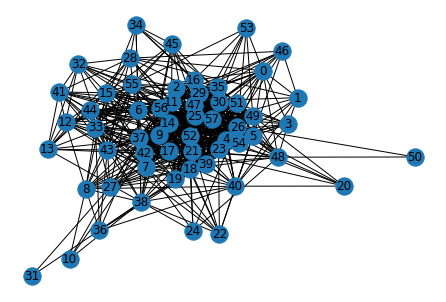

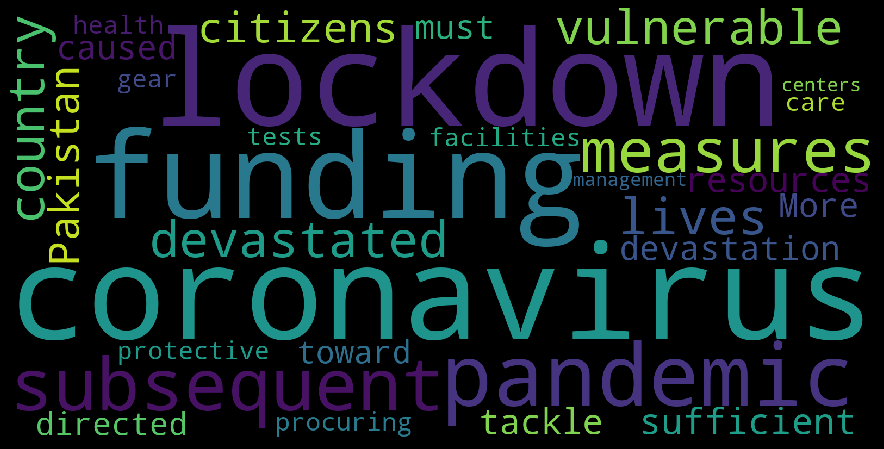

In [10]:
article_id = input("Enter the index of Article index ID for Summarization (0 to 5): ")
article_id=int(article_id)
text_summary(article_id)